In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv
/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv


# Обзор датасетов с новостями


In [2]:
true_df = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv')
fake_df = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv')
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df['target'] = 'True'
fake_df['target'] = 'Fake'

In [5]:
df = pd.concat([true_df, fake_df], ignore_index=True)

In [6]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [7]:
df.shape

(44898, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [9]:
df.describe()

,title,text,subject,date,target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [10]:
df.duplicated().sum()

209

In [11]:
df[['title', 'text']].duplicated().sum()

5793

In [12]:
df = df.drop_duplicates(subset=['title', 'text'])

In [13]:
df.shape

(39105, 5)

In [14]:
df.duplicated().sum()

0

# Предварительная обработка текста: Удаление знаков препинания и строчных букв

In [15]:
import string

def remove_punct(text):

    nopunct = "".join([char for char in text if char not in string.punctuation])
    return nopunct.lower()

df['text_no_punc_lower'] = df['text'].apply(lambda x: remove_punct(x))
df['title_no_punc_lower'] = df['title'].apply(lambda x: remove_punct(x))

In [16]:
df.head()

,title,text,subject,date,target,text_no_punc_lower,title_no_punc_lower
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,washington reuters the head of a conservative...,as us budget fight looms republicans flip thei...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,washington reuters transgender people will be...,us military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,washington reuters the special counsel invest...,senior us republican senator let mr mueller do...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,washington reuters trump campaign adviser geo...,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,seattlewashington reuters president donald tr...,trump wants postal service to charge much more...


## Загрузка ресурсов NLTK для токенизации

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [18]:
from nltk.tokenize import word_tokenize

In [19]:
df['text_tokenized'] = df['text_no_punc_lower'].apply(word_tokenize)
df['title_tokenized'] = df['title_no_punc_lower'].apply(word_tokenize)

In [20]:
df.head()

,title,text,subject,date,target,text_no_punc_lower,title_no_punc_lower,text_tokenized,title_tokenized
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,washington reuters the head of a conservative...,as us budget fight looms republicans flip thei...,"[washington, reuters, the, head, of, a, conser...","[as, us, budget, fight, looms, republicans, fl..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,washington reuters transgender people will be...,us military to accept transgender recruits on ...,"[washington, reuters, transgender, people, wil...","[us, military, to, accept, transgender, recrui..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,washington reuters the special counsel invest...,senior us republican senator let mr mueller do...,"[washington, reuters, the, special, counsel, i...","[senior, us, republican, senator, let, mr, mue..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,washington reuters trump campaign adviser geo...,fbi russia probe helped by australian diplomat...,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, by, australian, d..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,seattlewashington reuters president donald tr...,trump wants postal service to charge much more...,"[seattlewashington, reuters, president, donald...","[trump, wants, postal, service, to, charge, mu..."


In [21]:
from nltk.corpus import stopwords

In [22]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [23]:
stop_words = set(stopwords.words('english'))

In [24]:
no_stop_words = []
def remove_stopwords(tokens):
    no_stop_words = [word for word in tokens if word not in stop_words]
    return no_stop_words

df['text_no_stopwords'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))
df['title_no_stopwords'] = df['title_tokenized'].apply(lambda x: remove_stopwords(x))

In [25]:
df.head()

,title,text,subject,date,target,text_no_punc_lower,title_no_punc_lower,text_tokenized,title_tokenized,text_no_stopwords,title_no_stopwords
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,washington reuters the head of a conservative...,as us budget fight looms republicans flip thei...,"[washington, reuters, the, head, of, a, conser...","[as, us, budget, fight, looms, republicans, fl...","[washington, reuters, head, conservative, repu...","[us, budget, fight, looms, republicans, flip, ..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,washington reuters transgender people will be...,us military to accept transgender recruits on ...,"[washington, reuters, transgender, people, wil...","[us, military, to, accept, transgender, recrui...","[washington, reuters, transgender, people, all...","[us, military, accept, transgender, recruits, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,washington reuters the special counsel invest...,senior us republican senator let mr mueller do...,"[washington, reuters, the, special, counsel, i...","[senior, us, republican, senator, let, mr, mue...","[washington, reuters, special, counsel, invest...","[senior, us, republican, senator, let, mr, mue..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,washington reuters trump campaign adviser geo...,fbi russia probe helped by australian diplomat...,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, by, australian, d...","[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, australian, diplo..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,seattlewashington reuters president donald tr...,trump wants postal service to charge much more...,"[seattlewashington, reuters, president, donald...","[trump, wants, postal, service, to, charge, mu...","[seattlewashington, reuters, president, donald...","[trump, wants, postal, service, charge, much, ..."


In [26]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [27]:
wn_lemmatizer = nltk.WordNetLemmatizer()

In [28]:
def lemmatizing(no_stop_words):
    lemmatized = [wn_lemmatizer.lemmatize(word, pos='v') for word in no_stop_words]
    return lemmatized

df['text_lemmatized'] = df['text_no_stopwords'].apply(lambda x: lemmatizing(x))
df['title_lemmatized'] = df['title_no_stopwords'].apply(lambda x: lemmatizing(x))

In [29]:
df.head()

,title,text,subject,date,target,text_no_punc_lower,title_no_punc_lower,text_tokenized,title_tokenized,text_no_stopwords,title_no_stopwords,text_lemmatized,title_lemmatized
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,washington reuters the head of a conservative...,as us budget fight looms republicans flip thei...,"[washington, reuters, the, head, of, a, conser...","[as, us, budget, fight, looms, republicans, fl...","[washington, reuters, head, conservative, repu...","[us, budget, fight, looms, republicans, flip, ...","[washington, reuters, head, conservative, repu...","[us, budget, fight, loom, republicans, flip, f..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,washington reuters transgender people will be...,us military to accept transgender recruits on ...,"[washington, reuters, transgender, people, wil...","[us, military, to, accept, transgender, recrui...","[washington, reuters, transgender, people, all...","[us, military, accept, transgender, recruits, ...","[washington, reuters, transgender, people, all...","[us, military, accept, transgender, recruit, m..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,washington reuters the special counsel invest...,senior us republican senator let mr mueller do...,"[washington, reuters, the, special, counsel, i...","[senior, us, republican, senator, let, mr, mue...","[washington, reuters, special, counsel, invest...","[senior, us, republican, senator, let, mr, mue...","[washington, reuters, special, counsel, invest...","[senior, us, republican, senator, let, mr, mue..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,washington reuters trump campaign adviser geo...,fbi russia probe helped by australian diplomat...,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, by, australian, d...","[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, help, australian, diploma..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,seattlewashington reuters president donald tr...,trump wants postal service to charge much more...,"[seattlewashington, reuters, president, donald...","[trump, wants, postal, service, to, charge, mu...","[seattlewashington, reuters, president, donald...","[trump, wants, postal, service, charge, much, ...","[seattlewashington, reuters, president, donald...","[trump, want, postal, service, charge, much, a..."


# Просмотр лемматизированных токенов

In [30]:
for word in df['text_lemmatized'][0]:
    print(word)

washington
reuters
head
conservative
republican
faction
us
congress
vote
month
huge
expansion
national
debt
pay
tax
cut
call
“
fiscal
conservative
”
sunday
urge
budget
restraint
2018
keep
sharp
pivot
way
among
republicans
us
representative
mark
meadows
speak
cbs
’
“
face
nation
”
draw
hard
line
federal
spend
lawmakers
brace
battle
january
return
holiday
wednesday
lawmakers
begin
try
pass
federal
budget
fight
likely
link
issue
immigration
policy
even
november
congressional
election
campaign
approach
republicans
seek
keep
control
congress
president
donald
trump
republicans
want
big
budget
increase
military
spend
democrats
also
want
proportional
increase
nondefense
“
discretionary
”
spend
program
support
education
scientific
research
infrastructure
public
health
environmental
protection
“
trump
administration
already
will
say
‘
’
go
increase
nondefense
discretionary
spend
7
percent
’
”
meadows
chairman
small
influential
house
freedom
caucus
say
program
“
democrats
say
’
enough
need
give
g

In [31]:
df['text_lemmatized']

0        [washington, reuters, head, conservative, repu...
1        [washington, reuters, transgender, people, all...
2        [washington, reuters, special, counsel, invest...
3        [washington, reuters, trump, campaign, adviser...
4        [seattlewashington, reuters, president, donald...
                               ...                        
44115    [21st, century, wire, say, world, stage, men, ...
44116    [randy, johnson, 21st, century, wirethe, major...
44117    [tune, alternate, current, radio, network, acr...
44118    [21st, century, wire, say, new, front, open, l...
44119    [21st, century, wire, say, far, away, guess, w...
Name: text_lemmatized, Length: 39105, dtype: object

# Фильтрация токенов и создание новых признаков

In [32]:
unwanted = {'”', '“', '’', '‘'}
df["text_lemmatized"] = df["text_lemmatized"].apply(
    lambda lst: [w for w in lst if w not in unwanted]
)

df["title_lemmatized"] = df["title_lemmatized"].apply(
    lambda lst: [w for w in lst if w not in unwanted]
)
for idx, token_list in enumerate(df["text_lemmatized"]):
    for word in token_list:
        if word in {'”', '“'}:
            print(f"Found {word} in row {idx}")
for idx, token_list in enumerate(df["title_lemmatized"]):
    for word in token_list:
        if word in {'”', '“'}:
            print(f"Found {word} in row {idx}")
df['text_prevectorization'] = df['text_lemmatized'].apply(lambda x: ' '.join(x))
df['title_prevectorization'] = df['title_lemmatized'].apply(lambda x: ' '.join(x))
df['text_chars_before'] = df['text'].apply(lambda x: len(x.replace(" ", "")))
df['text_chars_after'] = df['text_lemmatized'].apply(lambda words: sum(len(word) for word in words))
df['text_uc_count'] = df['text'].apply(lambda x: sum(1 for w in x.split() if w.isupper()))
df['title_uc_count'] = df['title'].apply(lambda x: sum(1 for w in x.split() if w.isupper()))
df.head()

,title,text,subject,date,target,text_no_punc_lower,title_no_punc_lower,text_tokenized,title_tokenized,text_no_stopwords,title_no_stopwords,text_lemmatized,title_lemmatized,text_prevectorization,title_prevectorization,text_chars_before,text_chars_after,text_uc_count,title_uc_count
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,washington reuters the head of a conservative...,as us budget fight looms republicans flip thei...,"[washington, reuters, the, head, of, a, conser...","[as, us, budget, fight, looms, republicans, fl...","[washington, reuters, head, conservative, repu...","[us, budget, fight, looms, republicans, flip, ...","[washington, reuters, head, conservative, repu...","[us, budget, fight, loom, republicans, flip, f...",washington reuters head conservative republica...,us budget fight loom republicans flip fiscal s...,3907,2771,12,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,washington reuters transgender people will be...,us military to accept transgender recruits on ...,"[washington, reuters, transgender, people, wil...","[us, military, to, accept, transgender, recrui...","[washington, reuters, transgender, people, all...","[us, military, accept, transgender, recruits, ...","[washington, reuters, transgender, people, all...","[us, military, accept, transgender, recruit, m...",washington reuters transgender people allow fi...,us military accept transgender recruit monday ...,3453,2526,7,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,washington reuters the special counsel invest...,senior us republican senator let mr mueller do...,"[washington, reuters, the, special, counsel, i...","[senior, us, republican, senator, let, mr, mue...","[washington, reuters, special, counsel, invest...","[senior, us, republican, senator, let, mr, mue...","[washington, reuters, special, counsel, invest...","[senior, us, republican, senator, let, mr, mue...",washington reuters special counsel investigati...,senior us republican senator let mr mueller job,2324,1640,7,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,washington reuters trump campaign adviser geo...,fbi russia probe helped by australian diplomat...,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, by, australian, d...","[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, australian, diplo...","[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, help, australian, diploma...",washington reuters trump campaign adviser geor...,fbi russia probe help australian diplomat tipo...,2085,1494,4,2
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,seattlewashington reuters president donald tr...,trump wants postal service to charge much more...,"[seattlewashington, reuters, president, donald...","[trump, wants, postal, service, to, charge, mu...","[seattlewashington, reuters, president, donald...","[trump, wants, postal, service, charge, much, ...","[seattlewashington, reuters, president, donald...","[trump, want, postal, service, charge, much, a...",seattlewashington reuters president donald tru...,trump want postal service charge much amazon s...,4341,3038,15,0


# Построение модели классификации текстов

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['text_prevectorization', 'title_prevectorization',
        'text_chars_before', 'text_chars_after',
        'text_uc_count', 'title_uc_count']]
y = df['target']

title_vectorizer = TfidfVectorizer()
text_vectorizer = TfidfVectorizer()

title_tfidf = title_vectorizer.fit_transform(X['title_prevectorization'])
text_tfidf = text_vectorizer.fit_transform(X['text_prevectorization'])

scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(X[['text_chars_before', 'text_chars_after',
                                         'text_uc_count', 'title_uc_count']])

from scipy.sparse import hstack
X_all = hstack([title_tfidf, text_tfidf, numeric_scaled])

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      3582
        True       0.98      0.99      0.99      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



# Обучение модели Naive Bayes с MinMax Scaling

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
numeric_minmax = minmax_scaler.fit_transform(X[['text_chars_before', 'text_chars_after', 'text_uc_count', 'title_uc_count']])

X_all_nb = hstack([title_tfidf, text_tfidf, numeric_minmax])

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_all_nb, y, test_size=0.2, random_state=42, stratify=y)

nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train_nb)

nb_pred = nb_model.predict(X_test_nb)
print("Naive Bayes Results: ")
print(classification_report(y_test_nb, nb_pred))

Naive Bayes Results: 
              precision    recall  f1-score   support

        Fake       0.97      0.92      0.95      3582
        True       0.94      0.98      0.96      4239

    accuracy                           0.95      7821
   macro avg       0.95      0.95      0.95      7821
weighted avg       0.95      0.95      0.95      7821



# метод опорных векторов

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Создаем модель Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_nb, y_train_nb)
lr_pred = lr_model.predict(X_test_nb)
print("Logistic Regression Results:")
print(classification_report(y_test_nb, lr_pred))

# Создаем модель Support Vector Machine
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_nb, y_train_nb)
svm_pred = svm_model.predict(X_test_nb)
print("SVM Results:")
print(classification_report(y_test_nb, svm_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      3582
        True       0.99      1.00      0.99      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821

SVM Results:
              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      3582
        True       1.00      1.00      1.00      4239

    accuracy                           1.00      7821
   macro avg       1.00      1.00      1.00      7821
weighted avg       1.00      1.00      1.00      7821



#  Voting Classifier

In [36]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', model),          # Random Forest
        ('nb', nb_model),       # Naive Bayes
        ('lr', lr_model),       # Logistic Regression
        ('svm', svm_model)      # Support Vector Machine
    ],
    voting='hard'               # Используем большинство голосов
)

voting_clf.fit(X_train_nb, y_train_nb)
voting_pred = voting_clf.predict(X_test_nb)

print("Voting Classifier Results:")
print(classification_report(y_test_nb, voting_pred))

Voting Classifier Results:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3582
        True       0.99      1.00      1.00      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



# Сравнеие всех моделей

In [37]:
from sklearn.metrics import accuracy_score

models = {
    'Random Forest': y_pred,
    'Naive Bayes': nb_pred, 
    'Logistic Regression': lr_pred,
    'SVM': svm_pred,
    'Voting Classifier': voting_pred
}

print("Model Comparison:")
print("=" * 50)
for name, predictions in models.items():
    accuracy = accuracy_score(y_test_nb, predictions)
    print(f"{name}: {accuracy:.4f}")

Model Comparison:
Random Forest: 0.9867
Naive Bayes: 0.9519
Logistic Regression: 0.9941
SVM: 0.9965
Voting Classifier: 0.9946


# Визуализация и анализ результатов

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Матрицы ошибок для всех моделей

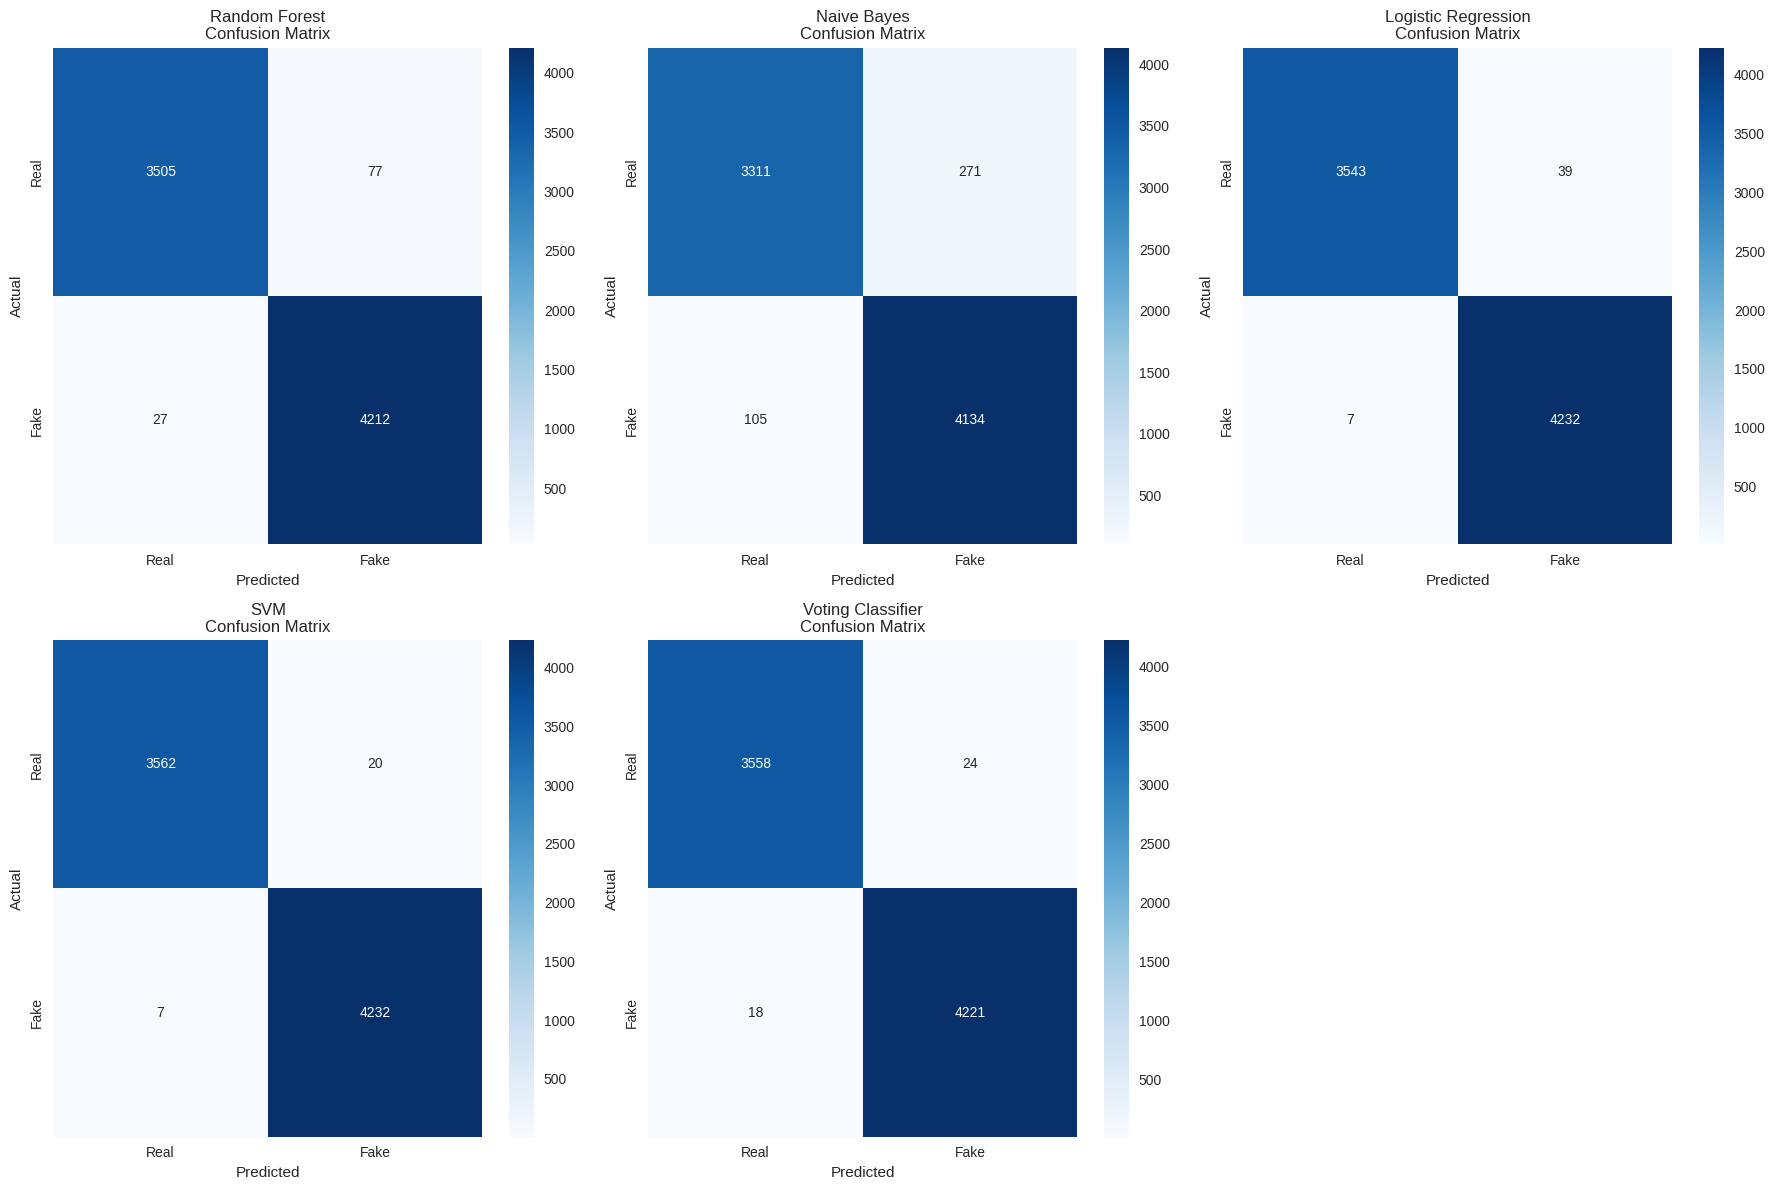

In [39]:
models = {
    'Random Forest': y_pred,
    'Naive Bayes': nb_pred,
    'Logistic Regression': lr_pred,
    'SVM': svm_pred,
    'Voting Classifier': voting_pred
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, predictions) in enumerate(models.items()):
    cm = confusion_matrix(y_test_nb, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nConfusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xticklabels(['Real', 'Fake'])
    axes[idx].set_yticklabels(['Real', 'Fake'])

# Скрываем последний пустой subplot
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()